<a href="https://colab.research.google.com/github/joshuajacobs2020/AirbnbPricePrediction/blob/main/Airbnb_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Cleaning

In this file I add new variables to the Kaggle Airbnb Dataset

## Importing Data

In [1]:
!git clone https://github.com/joshuajacobs2020/AirbnbPricePrediction
%cd /content/AirbnbPricePrediction/Data
! unzip airbnbopendata.zip

Cloning into 'AirbnbPricePrediction'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 24.99 MiB | 18.68 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/AirbnbPricePrediction/Data
Archive:  airbnbopendata.zip
  inflating: Airbnb_Open_Data.csv    


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Airbnb_Open_Data.csv")
df.head()

<ipython-input-2-f78297b2d398>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Cleaning Data

### Cleaning Price data

In [3]:
# Cleaning Price Data
def stripdollars(x):
  x = int(x.strip(" ").strip("$").replace(",",''))
  return x

# Remove NAs and convert to integer
airbnb = df[df["price"].isnull()==False]
airbnb["price"] = airbnb["price"].apply(stripdollars)
airbnb.loc[airbnb["service fee"].isnull(), "service fee"] = "0"
airbnb["service fee"] = airbnb["service fee"].apply(stripdollars)

# Creating total price of price + service fee
airbnb["totprice"] = airbnb["price"] + airbnb["service fee"]
airbnb["service fee"] / airbnb["price"] # Service fees are always 20% of total price

<ipython-input-3-639662e11ce8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb["price"] = airbnb["price"].apply(stripdollars)
<ipython-input-3-639662e11ce8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb["service fee"] = airbnb["service fee"].apply(stripdollars)
<ipython-input-3-639662e11ce8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

0         0.199793
1         0.197183
2         0.200000
3         0.201087
4         0.200980
            ...   
102594    0.200237
102595    0.199522
102596    0.200405
102597    0.199634
102598    0.199612
Length: 102352, dtype: float64

### Cleaning neighborhood data

In [4]:
# Getting boroughs dummies

# Fixing misspellings
airbnb.loc[airbnb["neighbourhood group"]=="brookln", "neighbourhood group"] = "Brooklyn"
airbnb.loc[airbnb["neighbourhood group"]=="manhatan", "neighbourhood group"] = "Manhattan"
airbnb = airbnb[airbnb["neighbourhood group"].isnull()==False]

# Creating Dummies
boroughs = pd.get_dummies(airbnb["neighbourhood group"],dtype=int)
airbnb = airbnb.join(boroughs)

airbnb.groupby("neighbourhood group").size()

airbnb = airbnb.reset_index()

### Fixing Reviews Per Month

If `number of reviews`=0, then `reviews per month` is automatically NA. We can easily fix this.

In [5]:
# Fixing reviews per month
airbnb.loc[((airbnb['reviews per month'].isna()) & (airbnb['number of reviews']==0) ),'reviews per month'] = 0

### Adding House Rules Length

This variable takes measures the length of characters in the house rules variable. We may expect house rules that are longer would be less desirable and charge lower prices.

<Axes: >

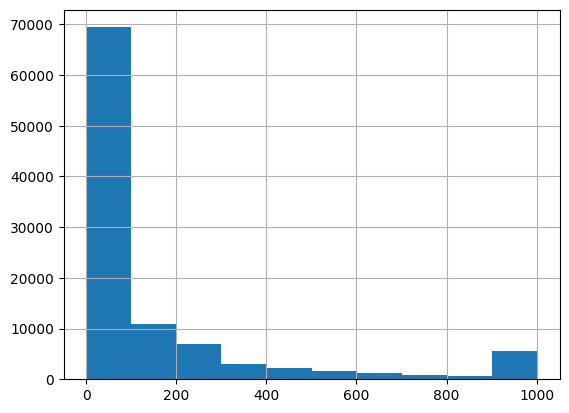

In [6]:
# Need to set null house rule values as blank
airbnb.loc[airbnb["house_rules"].isnull() == True, "house_rules"] = ""
airbnb.loc[airbnb["house_rules"]=="#NAME?", "house_rules"] = ""

# Calculating length
airbnb.loc[:,"house_rules_length"] = airbnb["house_rules"].apply(len)
airbnb["house_rules_length"].hist()

### Recoding variables

I recode cancellation policies, instant bookability, room types, and neighborhood data into factor variables.

In [7]:
# Factor variable
policy = pd.get_dummies(airbnb["cancellation_policy"], "cancellation",dtype=int)
airbnb = airbnb.join(policy)

In [8]:
# Binary variable
airbnb["instant_bookable_dummy"] = 0
airbnb.loc[airbnb["instant_bookable"]==True, "instant_bookable_dummy"] = 1

In [9]:
# Factor Variable
roomtypes = pd.get_dummies(airbnb["room type"],dtype=int)
airbnb = airbnb.join(roomtypes)

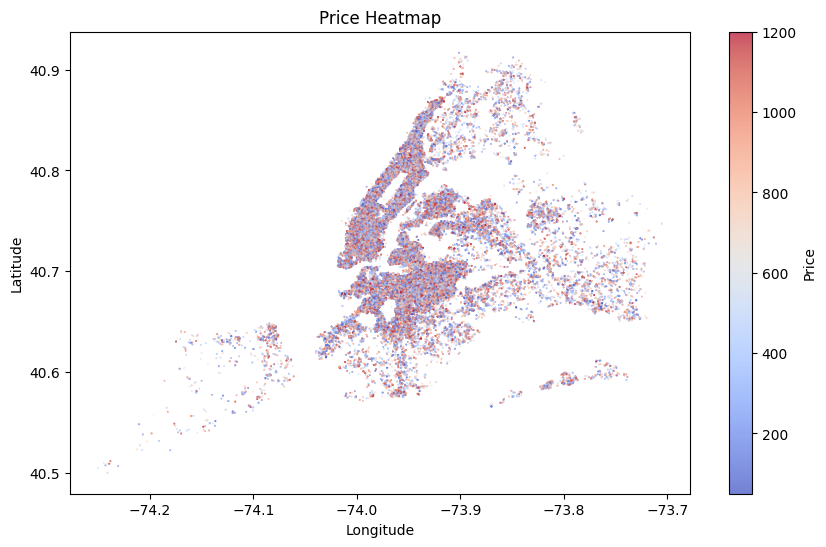

In [10]:
# Example Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(airbnb["long"], airbnb["lat"], c=airbnb["price"], cmap='coolwarm', alpha=0.7, s = .1)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Heatmap')
plt.grid(False)
plt.show()

## Extracting Name Data Variables

The types of words listed in the `NAME` variable would likely correspond to the quality of the listing. We can try to extract the most common, meaningful words used and see if they predict prices.

Since this will generate a high-dimensional dataset, we can attempt to reduce the dimensionality of these by applying PLS or PCA. We may seek to use cross-validation to test which method to use.

In [11]:
# Collecting counts of all words used for listings
from collections import Counter
import string

names_counter = Counter()
for words in airbnb["NAME"]:
  words = str(words).lower()
  words = ''.join([char for char in words if char not in string.punctuation])
  for word in str(words).split(' '):
      names_counter[word] += 1

names = list(names_counter.keys())
counts = list(names_counter.values())

text_counts = {"names": names, "counts": counts}
text_df = pd.DataFrame(text_counts)

In [12]:
# Getting rid of obviously trivial words
bad_names = ["and","AND","by","the",""," ","","UNTITLED","or","For","for","OF", "MY","My","an", "4"]

# Filtering text to high frequency, non-trivial words
freq_lim = 1000 # determines how often words have to be used to be included
text_filter = text_df.loc[text_df['counts'] > freq_lim,]
text_filter = text_filter[~text_filter["names"].isin(bad_names)]
text_filter

,names,counts
0,clean,2283
2,quiet,2514
3,apt,9335
4,home,4059
7,park,6364
...,...,...
567,bushwick,2691
572,away,1086
610,bedstuy,1146
670,minutes,1038


In [13]:
# Create filtered names from acceptable names
airbnb_text = airbnb[["id","NAME","price"]]
airbnb_text["NAME"] = airbnb_text["NAME"].str.lower()

def filter_words(text):
    return ' '.join([word for word in str(text).split(' ') if word in list(text_filter["names"])])

# Apply the function to the 'text' column
copy = airbnb_text['NAME'].copy()
airbnb_text['filtered_text'] = copy.apply(filter_words)

airbnb_text

<ipython-input-13-7e10b49dbaf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text["NAME"] = airbnb_text["NAME"].str.lower()
<ipython-input-13-7e10b49dbaf9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text['filtered_text'] = copy.apply(filter_words)


,id,NAME,price,filtered_text
0,1001254,clean & quiet apt home by the park,966,clean quiet apt home park
1,1002102,skylit midtown castle,142,midtown
2,1002403,the village of harlem....new york !,620,village of york
3,1002755,NaN,368,
4,1003689,entire apt: spacious studio/loft by central park,204,entire spacious central park
...,...,...,...,...
102319,6092437,spare room in williamsburg,844,room in williamsburg
102320,6092990,best location near columbia u,837,best location near
102321,6093542,"comfy, bright room in brooklyn",988,bright room in brooklyn
102322,6094094,big studio-one stop from midtown,546,big from midtown


In [14]:
# Create empty rows
for word in text_filter["names"]:
    airbnb_text[word] = 0

<ipython-input-14-f47655f7898a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text[word] = 0
<ipython-input-14-f47655f7898a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_text[word] = 0
<ipython-input-14-f47655f7898a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [15]:
# Update the columns with 1 if the word is in the text
for idx, row in airbnb_text.iterrows():
  for word in row['filtered_text'].split(' '):
      airbnb_text.at[idx, word] = 1

airbnb_text = airbnb_text.drop("", axis=1)

airbnb_text

<ipython-input-15-7488926cfbf4>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  airbnb_text.at[idx, word] = 1


,id,NAME,price,filtered_text,clean,quiet,apt,home,park,midtown,...,train,comfortable,astoria,gorgeous,min,bushwick,away,bedstuy,minutes,jfk
0,1001254,clean & quiet apt home by the park,966,clean quiet apt home park,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1002102,skylit midtown castle,142,midtown,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1002403,the village of harlem....new york !,620,village of york,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1002755,NaN,368,,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1003689,entire apt: spacious studio/loft by central park,204,entire spacious central park,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102319,6092437,spare room in williamsburg,844,room in williamsburg,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102320,6092990,best location near columbia u,837,best location near,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102321,6093542,"comfy, bright room in brooklyn",988,bright room in brooklyn,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102322,6094094,big studio-one stop from midtown,546,big from midtown,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Now that the text dummy variables have been created, I attempt to reduce the dimensionality using PCR and PLS.

In [16]:
# Make array of values and reduce dimensionality with PCR
text_array = np.array(airbnb_text.drop(["id","NAME","price","filtered_text"],axis=1))

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(text_array)
reduced = pca.fit_transform(text_array)
reduced_df_pca = pd.DataFrame(data=reduced,columns=["textfeat1","textfeat2"])

In [17]:
# Alternatively: Use PLS Regression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_validate

# Running PLS
pls_model = PLSRegression(n_components = 2)
pls_model.fit(text_array, airbnb["price"])

comp = pls_model.transform(text_array)
reduced_df_pls = pd.DataFrame(data=comp,columns=["textfeat1","textfeat2"])

In [ ]:
for i in range(1,1000):
  print(airbnb["house_rules"][i])

## Testing Models - OLS and Lasso

Below I do preliminary tests to see whether our data appears to be predictive of price.

In [19]:
# Split trianing and test data
from sklearn.model_selection import train_test_split

# Merging PLS text variables
airbnb_final = airbnb.join(reduced_df_pls)
df = airbnb_final[["price","textfeat1","textfeat2","Bronx", "Manhattan","Queens","Staten Island"]]
df = df.dropna()

# Splitting test and training
split_data = train_test_split(df, random_state = 1, test_size = .2)
training = split_data[0]
test = split_data[1]

# Splitting into x and y
y_train = np.float64(training["price"])
X_train = np.float64(training.drop("price",axis=1))

y_test = np.float64(test["price"])
X_test = np.float64(test.drop("price",axis=1))

print("Training obs: {}".format(training.shape[0]))
print("Test obs: {}".format(test.shape[0]))

Training obs: 81859
Test obs: 20465


Below `x1` and `x2` correspond to the text features

In [20]:
# Model using all data, use Brooklyn as base case
import statsmodels.api as sm
X_test = sm.add_constant(X_test)
model = sm.OLS(y_test,X_test, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.081
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           9.68e-09
Time:                        19:57:00   Log-Likelihood:            -1.4775e+05
No. Observations:               20465   AIC:                         2.955e+05
Df Residuals:                   20458   BIC:                         2.956e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        623.2386      3.690    168.882      0.000     616.005     630.472
x1           -13.8017      2.243     -6.152      0.000     -18.199      -9.404
x2             4.2923      2.016      2.129      0.033       0.340       8.244
x3            10.6682     14.670      0.727      0.467     -18.085      39.422
x4             2.1713      5.251      0.413      0.679      -8.122      12.465
x5            16.7723      7.493      2.238      0.025       2.085      31.460
x6           -10.1570     25.055     -0.405      0.685     -59.267      38.953
==============================================================================
Omnibus:                    16293.742   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1205.510
Skew:                          -0.005   Prob(JB):                    1.69e-262
Kurtosis:                       1.811   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below I try using all the data we have in an OLS regression to see the results.

In [24]:
# Model using all data, use Brooklyn as base case
import statsmodels.api as sm
Y = airbnb_final["totprice"]
X = airbnb_final[["Bronx", "Manhattan","Queens","Staten Island", "Construction year", "minimum nights",
            "reviews per month", "availability 365", "review rate number", "house_rules_length",
            "cancellation_moderate","cancellation_strict", "instant_bookable_dummy",
            "Hotel room", "Private room", "Shared room","textfeat1","textfeat2"]] # Use Brooklyn as the base, cancellation flexible as base, home/apt as base
X = X.join(pd.get_dummies(airbnb["neighbourhood"],dtype=int))
X = sm.add_constant(X)
X = X.drop('Allerton', axis=1) # Allerton is base

model = sm.OLS(Y,X, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               totprice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.408
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.19e-29
Time:                        19:57:41   Log-Likelihood:            -7.4724e+05
No. Observations:              100947   AIC:                         1.495e+06
Df Residuals:                  100707   BIC:                         1.497e+06
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1505.9140    466.654      3.227      0.001     591.277    2420.551
Bronx                        -92.5940    167.337     -0.553      0.580    -420.572     235.384
Manhattan                     13.1495    221.018      0.059      0.953    -420.043     446.342
Queens                      -123.8433    159.420     -0.777      0.437    -436.305     188.619
Staten Island               -123.0438    160.073     -0.769      0.442    -436.784     190.697
Construction year             -0.3117      0.217     -1.434      0.152      -0.738       0.114
minimum nights                -0.0640      0.044     -1.446      0.148      -0.151       0.023
reviews per month              0.8736      0.771      1.132      0.257      -0.638       2.386
availability 365              -0.0087      0.009     -0.913      0.361      -0.027       0.010
review rate number            -1.5787      0.976     -1.617      0.106      -3.492       0.335
house_rules_length            -0.0112      0.005     -2.308      0.021      -0.021      -0.002
cancellation_moderate         -1.7380      3.064     -0.567      0.571      -7.744       4.268
cancellation_strict           -2.1232      3.070     -0.692      0.489      -8.141       3.894
instant_bookable_dummy         0.5042      2.504      0.201      0.840      -4.404       5.412
Hotel room                    52.4046     37.439      1.400      0.162     -20.976     125.785
Private room                   0.4173      2.687      0.155      0.877      -4.849       5.684
Shared room                   11.7457      8.802      1.334      0.182      -5.507      28.998
textfeat1                    -14.8799      1.247    -11.936      0.000     -17.323     -12.436
textfeat2                      4.1533      1.166      3.563      0.000       1.868       6.438
Arden Heights                217.8356    131.320      1.659      0.097     -39.551     475.222
Arrochar                       3.6443     59.201      0.062      0.951    -112.389     119.678
Arverne                       31.8348     28.119      1.132      0.258     -23.279      86.948
Astoria                       11.2894     13.657      0.827      0.408     -15.479      38.058
Bath Beach                     3.7735    172.228      0.022      0.983    -333.791     341.338
Battery Park City           -166.8309    154.542     -1.080      0.280    -469.732     136.070
Bay Ridge                   -135.6781    163.790     -0.828      0.407    -456.705     185.348
Bay Terrace                   17.8860    138.154      0.129      0.897    -252.894     288.666
Bay Terrace, Staten Island  -231.2656    195.430     -1.183      0.237    -614.305     151.774
Baychester                  -147.1205     84.490     -1.741      0.082    -312.721      18.480
Bayside                      -59.9035     3

In [22]:
airbnb_final.columns

Index(['index', 'id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'totprice', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'house_rules_length', 'cancellation_flexible', 'cancellation_moderate',
       'cancellation_strict', 'instant_bookable_dummy', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room', 'textfeat1', 'textfeat2'],
      dtype='object')

In [25]:
airbnb_final.to_csv("AirbnbCleaned.csv")